In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
white_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\wine+quality\winequality-white.csv',sep=';') # Gathering data
white_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
white_wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
white_wine.columns = white_wine.columns.str.replace(" ", "_")

In [8]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [9]:
white_wine_low=white_wine[white_wine['quality_label'] != 'high']
white_wine_high=white_wine[white_wine['quality_label'] == 'high']

white_wine_low2 = white_wine_low[['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity']]
white_wine_high2 = white_wine_high[['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity']]

### Show Skewness

In [10]:
from scipy.stats import skew

for col in white_wine:
    print(col)
    print(skew(white_wine[col]))

fixed_acidity
0.6475530855160632
volatile_acidity
1.576496515957486
citric_acid
1.2815277799152376
residual_sugar
1.0767638711454448
chlorides
5.0217921696710315
free_sulfur_dioxide
1.4063140718346216
total_sulfur_dioxide
0.39059017758152365
density
0.9774735389049212
pH
0.457642339253789
sulphates
0.9768943947733427
alcohol
0.48719273327634327
quality
0.15574868141362455
quality_label


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
from scipy.stats import skew

for col in red_wine:
    print(col)
    print(skew(red_wine[col]))

alcohol
0.5320471359363514


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


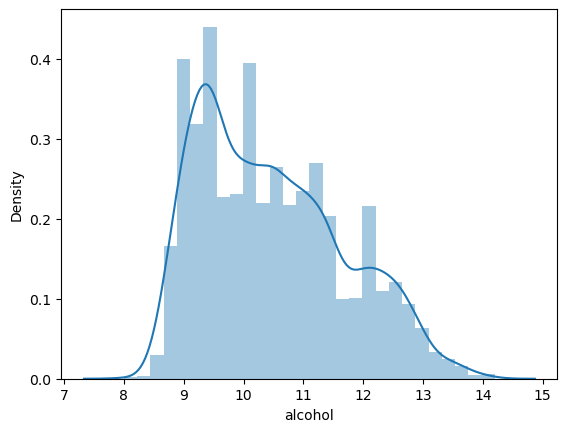

chlorides
5.017621433774883


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


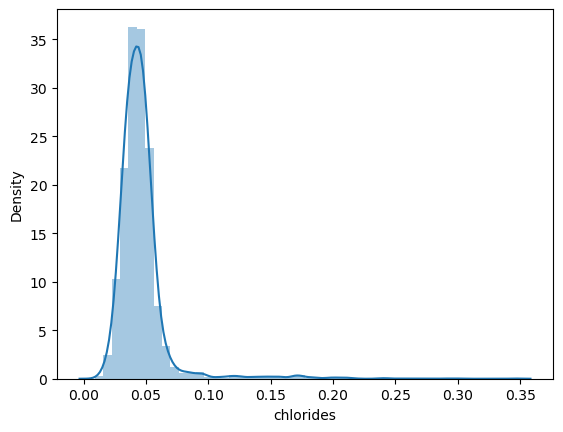

citric_acid
1.2836775449008961


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


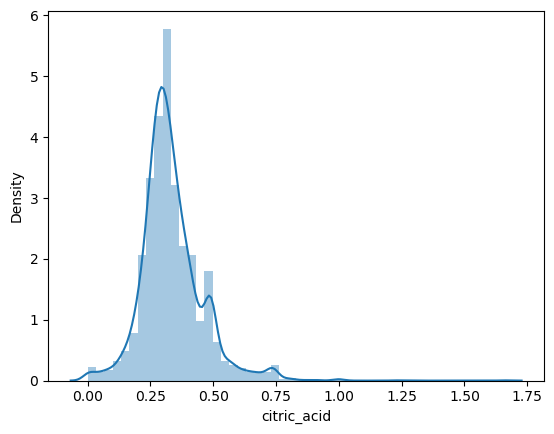

density
0.9938818721663397


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


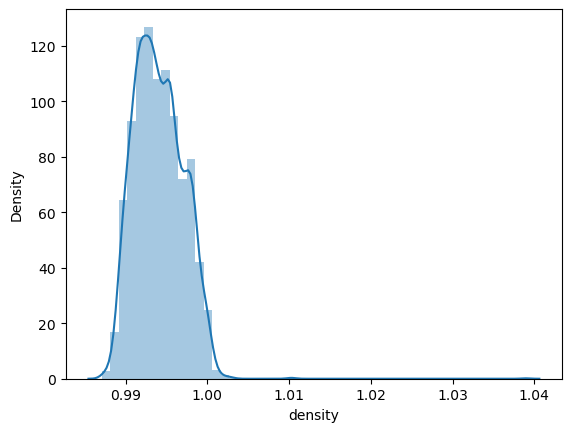

fixed_acidity
0.6865961365815204


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


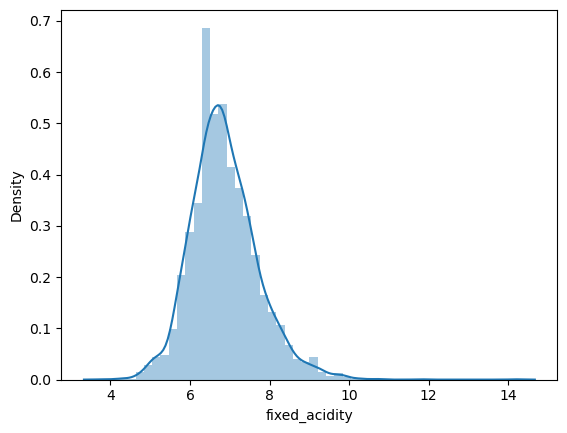

free_sulfur_dioxide
1.4058465768330284


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


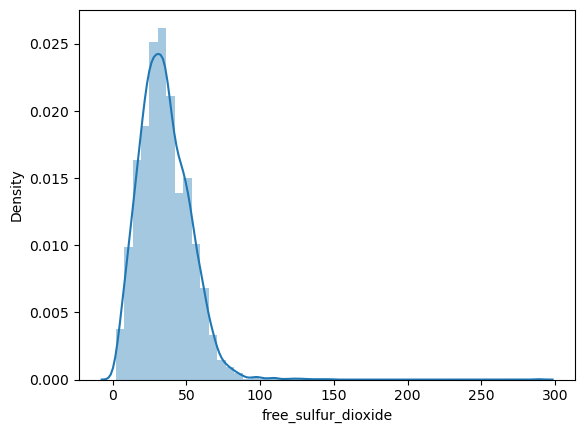

pH
0.47384416452019545


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


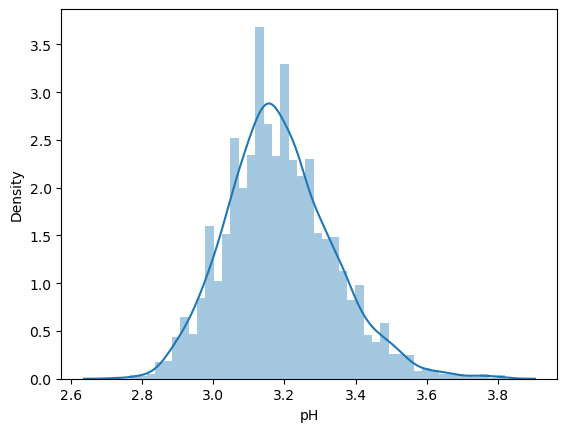

quality
-0.23767162925811142


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


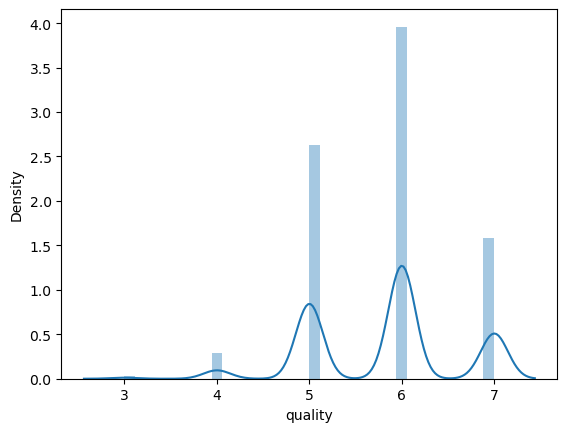

residual_sugar
1.0764581557296535


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


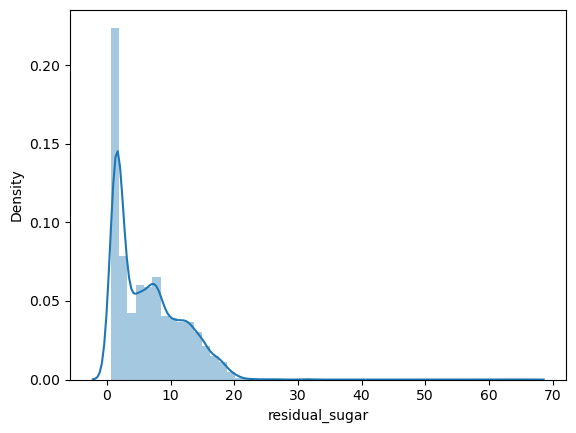

sulphates
0.9746113638796882


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


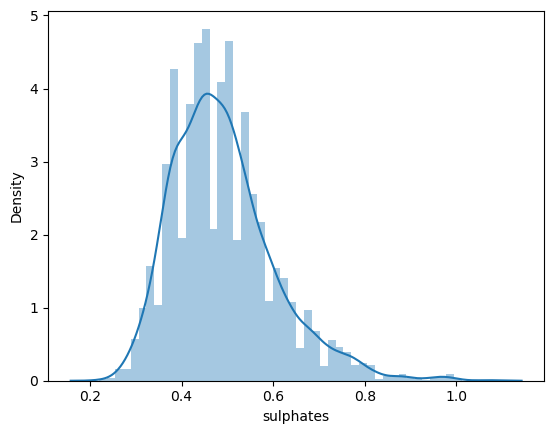

total_sulfur_dioxide
0.37574341392296584


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


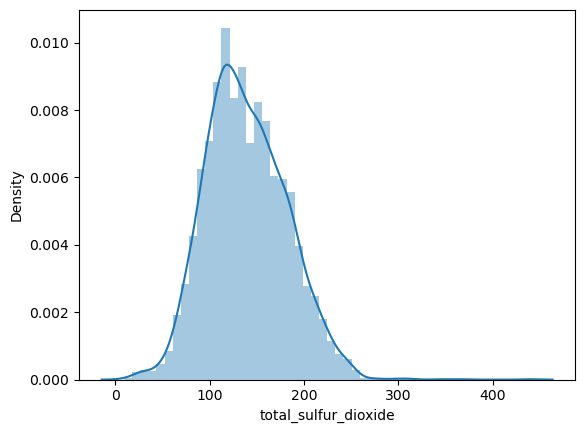

volatile_acidity
1.6035785370844047


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\743519569.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(white_wine_low2[col])


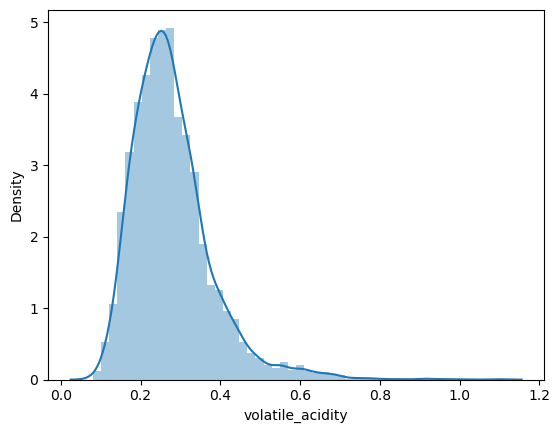

In [196]:
from scipy.stats import skew

for col in white_wine_low2:
    print(col)
    print(skew(white_wine_low2[col]))

    plt.figure()
    sns.distplot(white_wine_low2[col])
    plt.show()


C:\Users\janin\AppData\Local\Temp\ipykernel_27280\2528657023.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, color='limegreen', ax=ax[index], bins=50).set(ylabel=None)
C:\Users\janin\AppData\Local\Temp\ipykernel_27280\2528657023.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valu

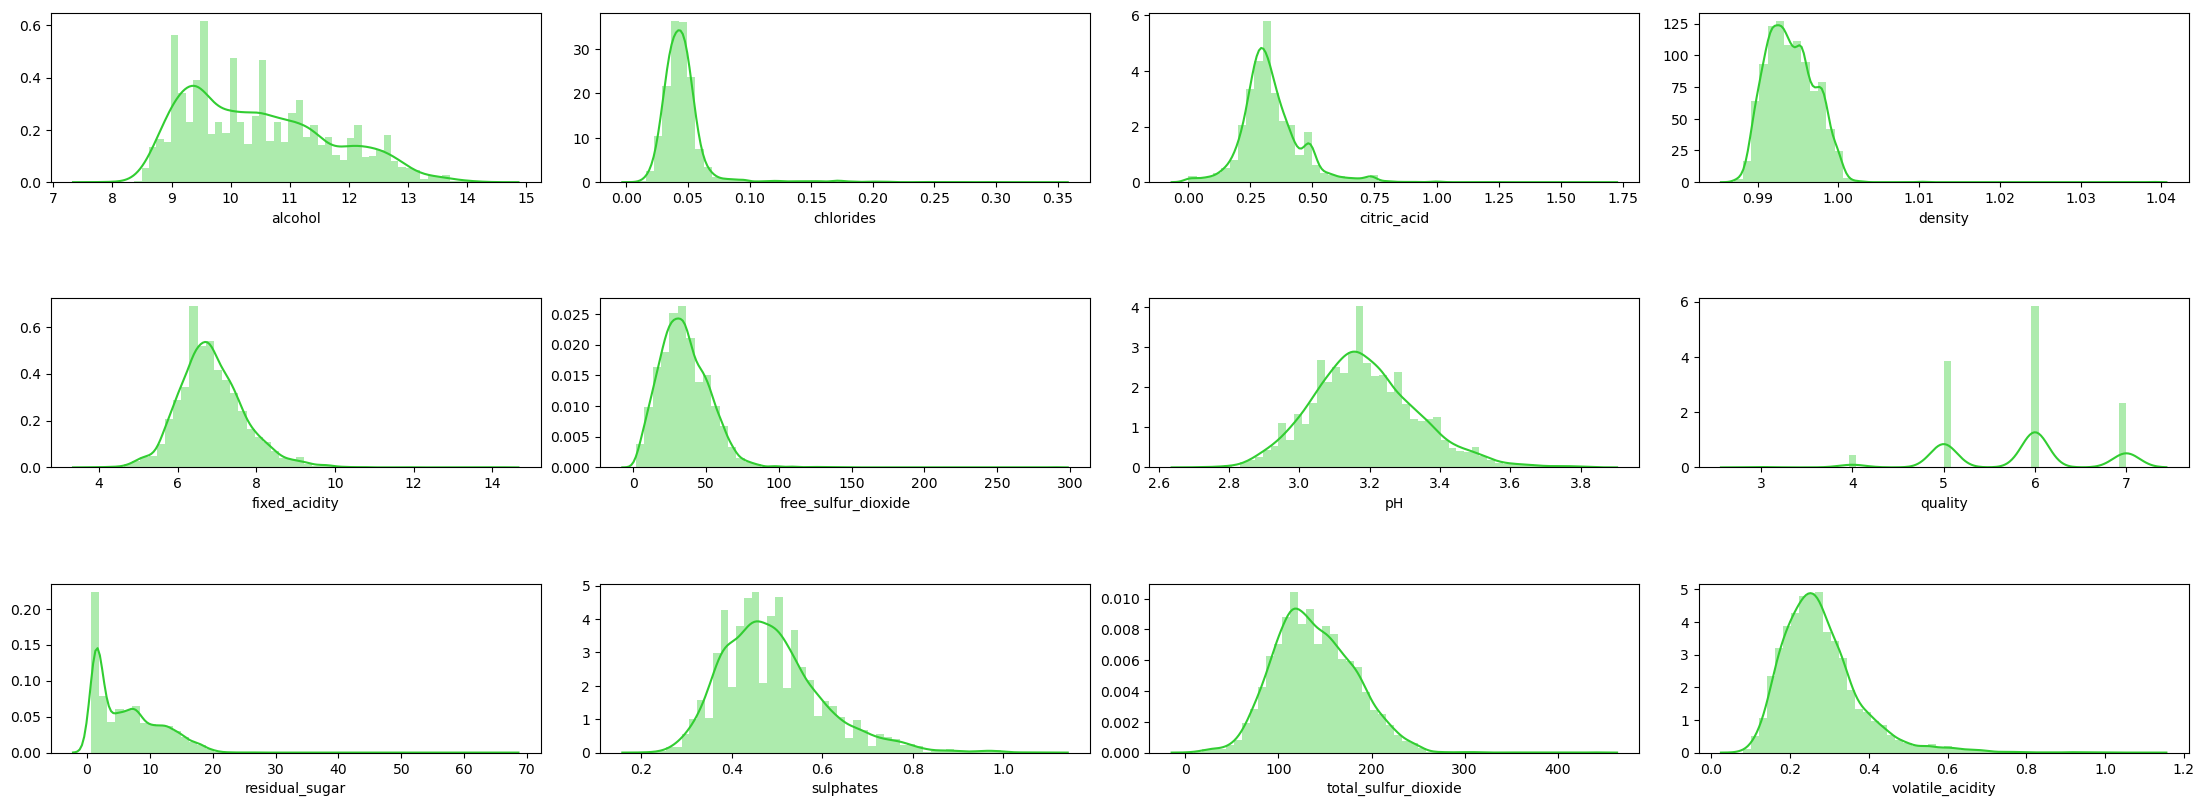

In [201]:
#Dist plot of all features:
# create dist plot
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(22,8), tight_layout=True)
index = 0
ax = ax.flatten()

for col, value in white_wine_low2.items():
    sns.distplot(value, color='limegreen', ax=ax[index], bins=50).set(ylabel=None)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [211]:
white_wine_ex.skew()

alcohol                 0.487342
chlorides               5.023331
citric_acid             1.281920
density                 0.977773
fixed_acidity           0.647751
free_sulfur_dioxide     1.406745
pH                      0.457783
quality                 0.155796
residual_sugar          1.077094
sulphates               0.977194
total_sulfur_dioxide    0.390710
volatile_acidity        1.576980
dtype: float64

In [213]:
white_wine_ex.kurtosis()

alcohol                 -0.698425
chlorides               37.564600
citric_acid              6.174901
density                  9.793807
fixed_acidity            2.172178
free_sulfur_dioxide     11.466342
pH                       0.530775
quality                  0.216526
residual_sugar           3.469820
sulphates                1.590930
total_sulfur_dioxide     0.571853
volatile_acidity         5.091626
dtype: float64

<Axes: >

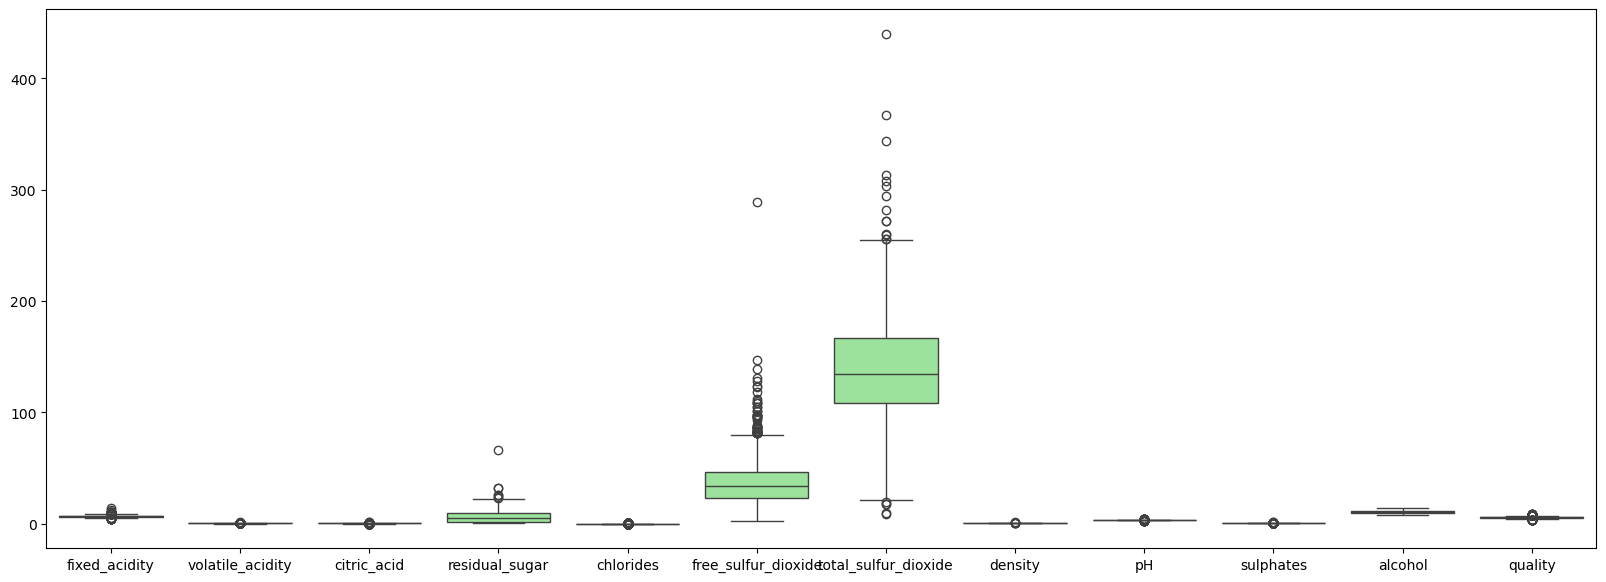

In [11]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=white_wine, color='lightgreen')

In [13]:
white_wine_ex=white_wine[['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity']]

In [14]:
from sklearn import preprocessing
standrd_scaler = preprocessing.StandardScaler()
np_scaled = standrd_scaler.fit_transform(white_wine_ex)
scaled_white_wine = pd.DataFrame(np_scaled, columns = [name for name in list(white_wine_ex)])
scaled_white_wine.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,-1.393152,-0.035355,0.213280,2.331512,0.172097,0.569932,-1.246921,0.13787,2.821349,-0.349184,0.744565,-0.081770
1,-0.824276,0.147747,0.048001,-0.009154,-0.657501,-1.253019,0.740029,0.13787,-0.944765,0.001342,-0.149685,0.215896
2,-0.336667,0.193523,0.543838,0.358665,1.475751,-0.312141,0.475102,0.13787,0.100282,-0.436816,-0.973336,0.017452
3,-0.499203,0.559727,-0.117278,0.525855,0.409125,0.687541,0.011480,0.13787,0.415768,-0.787342,1.121091,-0.478657
4,-0.499203,0.559727,-0.117278,0.525855,0.409125,0.687541,0.011480,0.13787,0.415768,-0.787342,1.121091,-0.478657


<Axes: >

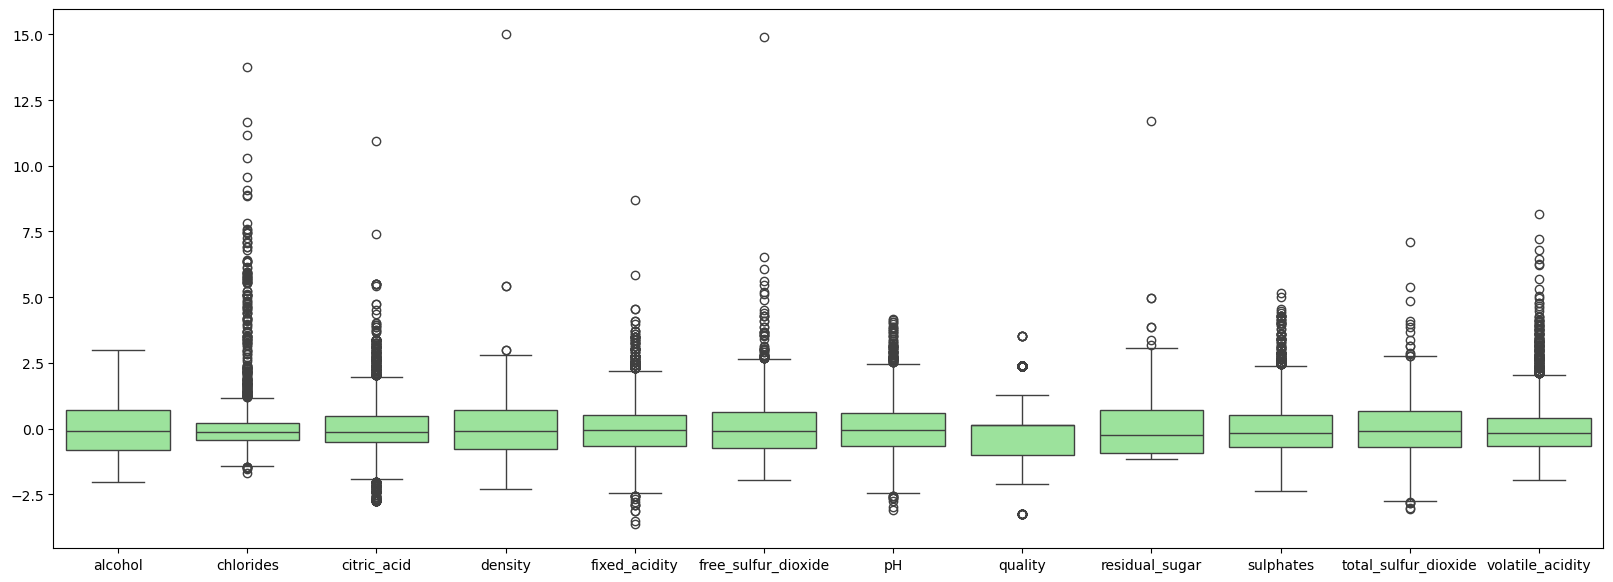

In [15]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=scaled_white_wine, color='lightgreen')

In [207]:
white_wine_low2.skew()

alcohol                 0.532216
chlorides               5.019217
citric_acid             1.284086
density                 0.994198
fixed_acidity           0.686815
free_sulfur_dioxide     1.406294
pH                      0.473995
quality                -0.237747
residual_sugar          1.076801
sulphates               0.974921
total_sulfur_dioxide    0.375863
volatile_acidity        1.604089
dtype: float64

In [203]:
white_wine_low2.kurtosis()

alcohol                 -0.603171
chlorides               37.188032
citric_acid              6.103472
density                 10.336337
fixed_acidity            2.211573
free_sulfur_dioxide     11.690760
pH                       0.585382
quality                 -0.138852
residual_sugar           3.513559
sulphates                1.623658
total_sulfur_dioxide     0.560953
volatile_acidity         5.287133
dtype: float64

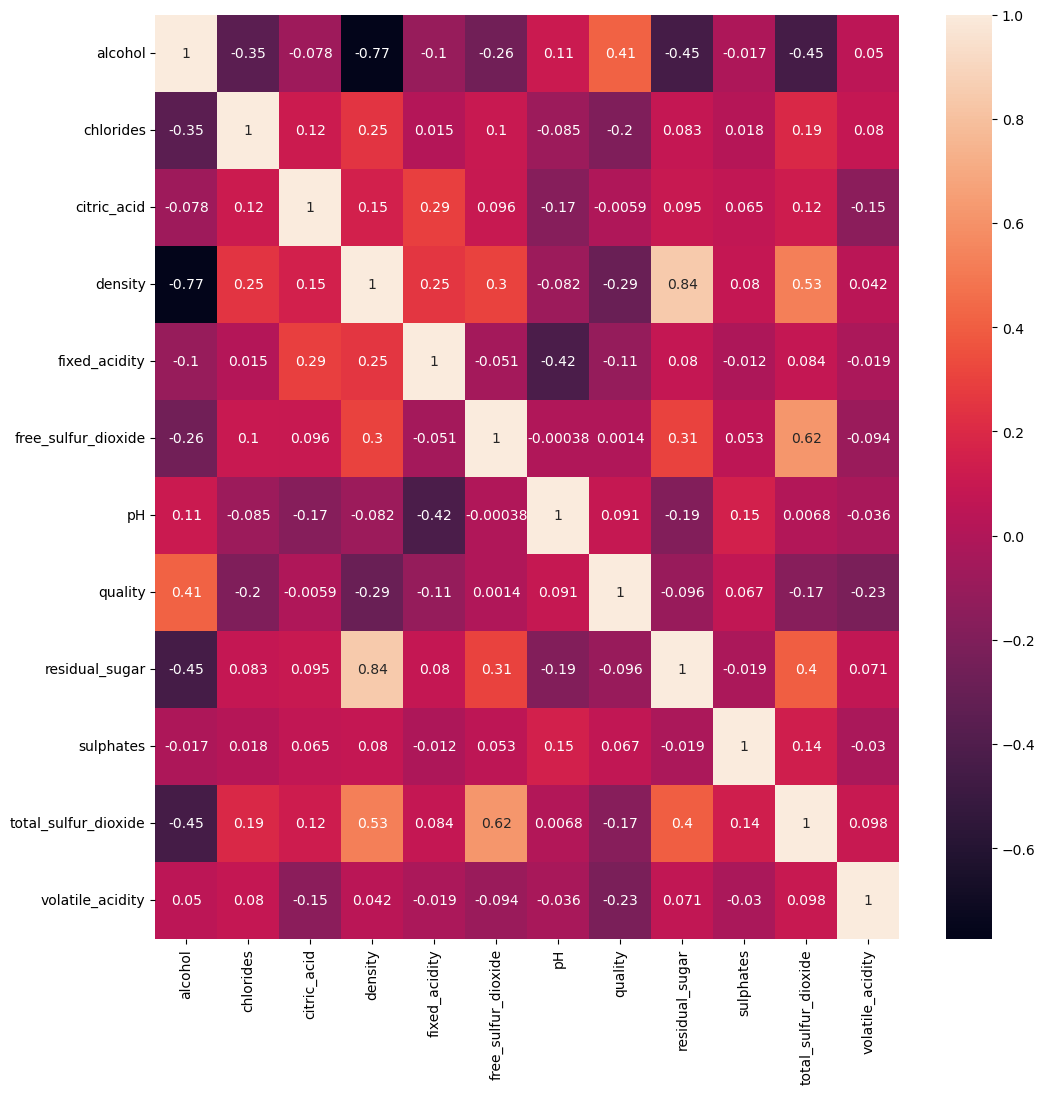

In [200]:
fig, axes = plt.subplots(figsize=(12,12))

sns.heatmap(white_wine_low2.corr(), annot=True)
plt.show()

### Remove Outliers from Low/Medium White Wine

Text(0.5, 1.0, 'Mid/Low White Wine (unscaled)')

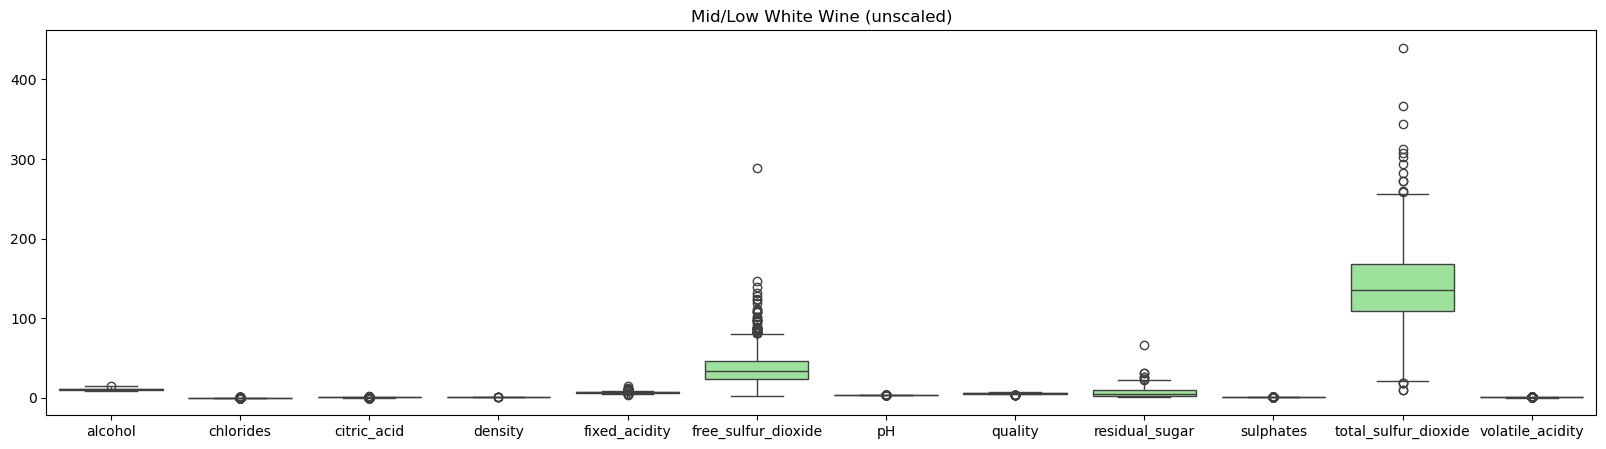

In [193]:
#before
fig = plt.figure(figsize = (20,5))

sns.boxplot(data=white_wine_low2, color='lightgreen').set_title("Mid/Low White Wine (unscaled)")


Text(0.5, 1.0, 'High White Wine (unscaled)')

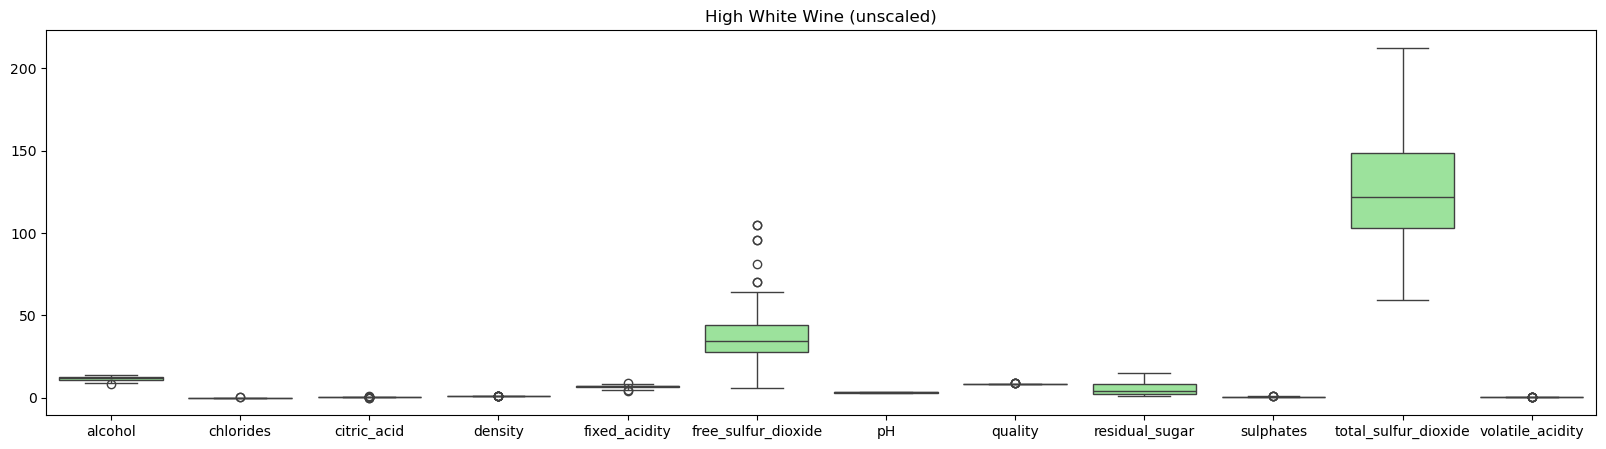

In [194]:
fig = plt.figure(figsize = (20,5))

sns.boxplot(data=white_wine_high2, color='lightgreen').set_title("High White Wine (unscaled)")


### Outliers

In [178]:
wdf=white_wine_low2

In [179]:
wdf.head(5)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8.8,0.045,0.36,1.0010,7.0,45.0,3.00,6,20.7,0.45,170.0,0.27
1,9.5,0.049,0.34,0.9940,6.3,14.0,3.30,6,1.6,0.49,132.0,0.30
2,10.1,0.050,0.40,0.9951,8.1,30.0,3.26,6,6.9,0.44,97.0,0.28
3,9.9,0.058,0.32,0.9956,7.2,47.0,3.19,6,8.5,0.40,186.0,0.23
4,9.9,0.058,0.32,0.9956,7.2,47.0,3.19,6,8.5,0.40,186.0,0.23


In [180]:
wdf.dtypes

alcohol                 float64
chlorides               float64
citric_acid             float64
density                 float64
fixed_acidity           float64
free_sulfur_dioxide     float64
pH                      float64
quality                   int64
residual_sugar          float64
sulphates               float64
total_sulfur_dioxide    float64
volatile_acidity        float64
dtype: object

In [187]:

# IQR Method to detect outliers
Q1 = wdf.quantile(0.25)
Q3 = wdf.quantile(0.75)
IQR = Q3 - Q1

# DataFrame of outliers
outliers_IQR_df = wdf[((wdf < (Q1 - 1.5 * IQR)) | (wdf > (Q3 + 1.5 * IQR))).any(axis=1)]

# Deducting outliers from the original dataset
wdf_deducted = wdf.drop(outliers_IQR_df.index)

# Print or save the results
print("Outliers:")
print(outliers_IQR_df)

print("\nDataset after outlier removal:")
print(wdf_deducted)

Outliers:
      alcohol  chlorides  citric_acid  density  fixed_acidity  \
14       9.70      0.040         0.62  1.00020            8.3   
16       9.60      0.046         0.04  0.99280            6.3   
23       9.30      0.074         0.14  0.99370            7.6   
35      12.80      0.080         0.43  0.99050            7.3   
40       9.40      0.172         0.39  0.99370            6.7   
...       ...        ...          ...      ...            ...   
4867    13.00      0.031         0.34  0.98854            5.3   
4877     8.80      0.032         0.00  0.99286            5.9   
4878     9.50      0.035         0.02  0.99234            6.2   
4886    12.15      0.028         0.28  0.99168            6.2   
4887    13.00      0.023         0.22  0.98928            6.2   

      free_sulfur_dioxide    pH  quality  residual_sugar  sulphates  \
14                   41.0  2.98        5           19.25       0.67   
16                   30.0  3.24        6            1.10       0.36

In [191]:
outliers_IQR_df.head(50)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
14,9.7,0.040,0.62,1.0002,8.3,41.0,2.98,5,19.25,0.67,172.0,0.420
16,9.6,0.046,0.04,0.9928,6.3,30.0,3.24,6,1.10,0.36,99.0,0.480
23,9.3,0.074,0.14,0.9937,7.6,25.0,3.05,5,1.50,0.51,168.0,0.670
35,12.8,0.080,0.43,0.9905,7.3,21.0,3.19,5,1.70,0.42,123.0,0.280
40,9.4,0.172,0.39,0.9937,6.7,63.0,3.11,6,2.50,0.36,158.0,0.230
41,9.4,0.173,0.39,0.9937,6.7,63.0,3.10,6,2.90,0.34,157.0,0.240
54,9.1,0.147,0.59,0.9930,6.8,38.0,3.05,6,0.90,0.38,132.0,0.200
60,8.6,0.092,0.24,0.9951,6.8,30.0,3.03,6,4.90,0.46,123.0,0.220
62,10.5,0.035,0.07,0.9910,7.0,17.0,3.02,5,1.10,0.34,151.0,0.470
65,9.1,0.064,0.03,0.9934,6.2,29.0,3.22,5,1.20,0.54,120.0,0.350


In [188]:
wdf_deducted

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,8.8,0.045,0.36,1.00100,7.0,45.0,3.00,6,20.7,0.45,170.0,0.27
1,9.5,0.049,0.34,0.99400,6.3,14.0,3.30,6,1.6,0.49,132.0,0.30
2,10.1,0.050,0.40,0.99510,8.1,30.0,3.26,6,6.9,0.44,97.0,0.28
3,9.9,0.058,0.32,0.99560,7.2,47.0,3.19,6,8.5,0.40,186.0,0.23
4,9.9,0.058,0.32,0.99560,7.2,47.0,3.19,6,8.5,0.40,186.0,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,11.2,0.039,0.29,0.99114,6.2,24.0,3.27,6,1.6,0.50,92.0,0.21
4894,9.6,0.047,0.36,0.99490,6.6,57.0,3.15,5,8.0,0.46,168.0,0.32
4895,9.4,0.041,0.19,0.99254,6.5,30.0,2.99,6,1.2,0.46,111.0,0.24
4896,12.8,0.022,0.30,0.98869,5.5,20.0,3.34,7,1.1,0.38,110.0,0.29


In [ ]:
from sklearn import preprocessing
standrd_scaler = preprocessing.StandardScaler()
np_scaled = standrd_scaler.fit_transform(red_wine_ex)
scaled_red_wine = pd.DataFrame(np_scaled, columns = [name for name in list(red_wine_ex)])
scaled_red_wine.head()